# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


from pprint import pprint

### Generate the Cities List by Using the `citipy` Library

In [12]:
## CHANGE THE SIZE FROM 20 TO 1500

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=20)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=20)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

In [15]:
# ## USE ONLY  TO TEST
# cities = ['Paris','London','Oslo','Beijing']
# print(sorted(cities))

['Beijing', 'London', 'Oslo', 'Paris']


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [16]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


In [17]:
#  TEST URL

xyz = f"{url}appid={weather_api_key}&q={'London'}&units=metric"

xyz = requests.get(xyz)
pprint(xyz)
xyz = xyz.json()

<Response [200]>


In [44]:
## TEST retrive infos
print(f'city name is {xyz['name']}')
print(f'weather is {xyz['weather'][0]['description']}')
print(f'latitude is {xyz['coord']['lat']}')
print(f'Longitude is {xyz['coord']['lon']}')
print(f'Max Temp is {xyz['main']['temp_max']}')
print(f'Humidity is {xyz['main']['humidity']}')
print(f'Cloudiness is {xyz['clouds']['all']}')
print(f'Wind Speed is {xyz['wind']['speed']}')
print(f'Country is {xyz['sys']['country']}')
print(f'Date is {xyz['dt']}')

city name is London
weather is overcast clouds
latitude is 51.5085
Longitude is -0.1257
Max Temp is 9.44
Humidity is 90
Cloudiness is 97
Wind Speed is 0.45
Country is GB
Date is 1728095700


In [9]:
# city_x = ['adamstown', 'albany', 'as sulayyil', 'college']
# z_list = []
# city_url = f"{url}appid={weather_api_key}&q={city}&units=metric'"
# for city in city_x:
        
#         # Parse the JSON and retrieve data
#         city_weather = requests.get(city_url).json()

#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
#         city_lat = city_weather['coord']['lat']
#         city_lng = city_weather['coord']['lon']
#         city_max_temp = city_weather['main']['temp_max']
#         city_humidity = city_weather['main']['humidity']
#         city_clouds = city_weather['weather'][0]['description']
#         city_wind = city_weather['wind']['speed']
#         city_country = city_weather['sys']['country']
#         city_date = city_weather['dt']

#         # Append the City information into city_data list
#         z_list.append({"City": city,
#                           "Lat": city_lat,
#                           "Lng": city_lng,
#                           "Max Temp": city_max_temp,
#                           "Humidity": city_humidity,
#                           "Cloudiness": city_clouds,
#                           "Wind Speed": city_wind,
#                           "Country": city_country,
#                           "Date": city_date})
# z_list

In [45]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric'"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Paris
Processing Record 2 of Set 1 | London
Processing Record 3 of Set 1 | Oslo
Processing Record 4 of Set 1 | Beijing
-----------------------------
Data Retrieval Complete      
-----------------------------


In [46]:
len(city_data)

4

In [47]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          4
Lat           4
Lng           4
Max Temp      4
Humidity      4
Cloudiness    4
Wind Speed    4
Country       4
Date          4
dtype: int64

In [48]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Paris,48.8534,2.3488,281.03,91,0,2.06,FR,1728097646
1,London,51.5085,-0.1257,283.01,89,100,3.09,GB,1728097550
2,Oslo,59.9127,10.7461,280.13,96,100,0.45,NO,1728097739
3,Beijing,39.9075,116.3972,291.09,34,22,0.52,CN,1728097740


In [49]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [50]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Paris,48.8534,2.3488,281.03,91,0,2.06,FR,1728097646
1,London,51.5085,-0.1257,283.01,89,100,3.09,GB,1728097550
2,Oslo,59.9127,10.7461,280.13,96,100,0.45,NO,1728097739
3,Beijing,39.9075,116.3972,291.09,34,22,0.52,CN,1728097740


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

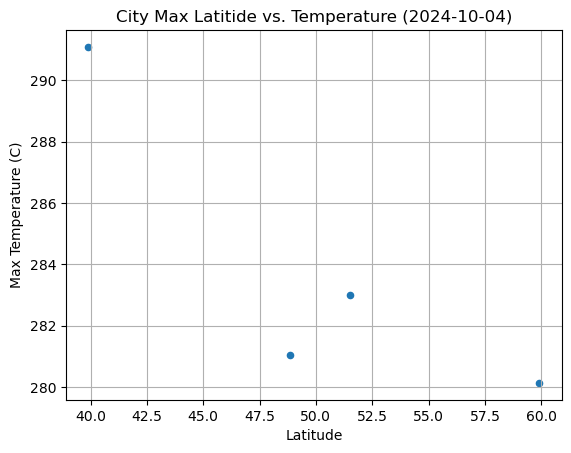

In [56]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter('Lat','Max Temp')


#today's date
Today = time.localtime()
Today = time.strftime('%Y-%m-%d',Today)

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Max Latitide vs. Temperature ({Today})')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

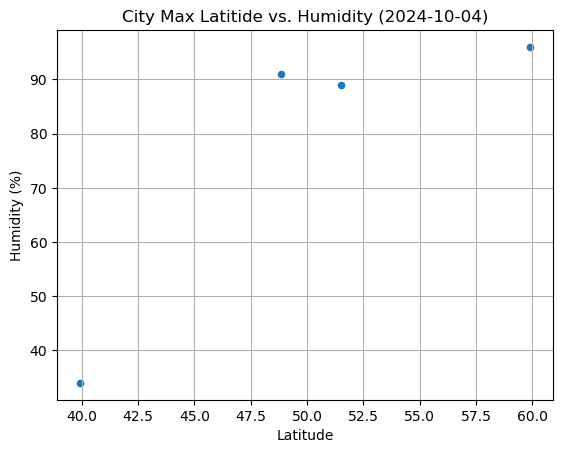

In [57]:
# Build scatter plot for latitude vs. temperature

city_data_df.plot.scatter('Lat','Humidity')

#today's date
Today = time.localtime()
Today = time.strftime('%Y-%m-%d',Today)

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Max Latitide vs. Humidity ({Today})')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

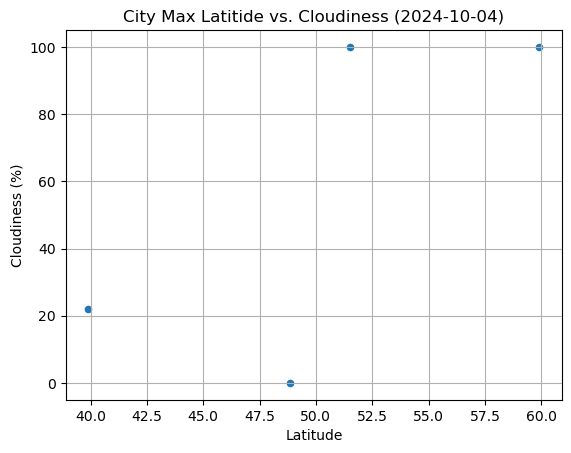

In [58]:
city_data_df.plot.scatter('Lat','Cloudiness')

#today's date
Today = time.localtime()
Today = time.strftime('%Y-%m-%d',Today)

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Max Latitide vs. Cloudiness ({Today})')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

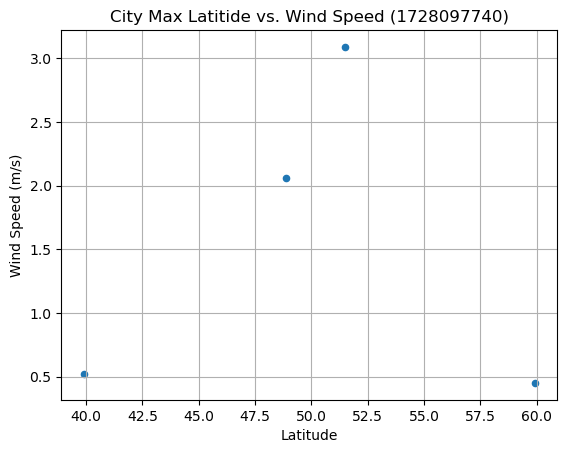

In [54]:
city_data_df.plot.scatter('Lat','Wind Speed')

#today's date
Today = time.localtime()
Today = time.strftime('%Y-%m-%d',Today)

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Max Latitide vs. Wind Speed ({Today})')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE